In [1]:
print("hello world")

hello world


In [2]:
import pandas as pd
file_path = 'C:/Users/anton/OneDrive/Pulpit/Mastercard/Master/merged.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location.lat,location.long,...,country.x,signup_date,risk_score,category,country.y,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,TX000000,2022-06-17T23:28:00,U14804,M0314,130.03,in-store,EUR,Android,40.057938,14.959737,...,Sweden,2022-08-10,0.426675,travel,France,0.581711,3,74.97,23,1
1,TX000001,2022-01-04T15:39:00,U16634,M0675,132.00,online,EUR,Android,42.059350,1.596625,...,France,2024-05-22,0.729627,electronics,Germany,0.568933,2,56.92,23,0
2,TX000002,2022-09-09T21:58:00,U18005,M0479,8.65,online,EUR,Android,50.923432,21.795262,...,Italy,2021-05-18,0.393848,gaming,Denmark,0.608070,5,98.93,75,0
3,TX000003,2023-11-20T06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,56.833396,-9.881566,...,Portugal,2021-09-05,0.393405,electronics,Portugal,0.592656,4,21.60,82,0
4,TX000004,2022-04-28T08:08:00,U04642,M0128,101.92,in-store,EUR,Android,54.042996,2.168516,...,Austria,2023-06-01,0.524168,gaming,Spain,0.450223,4,60.61,82,0


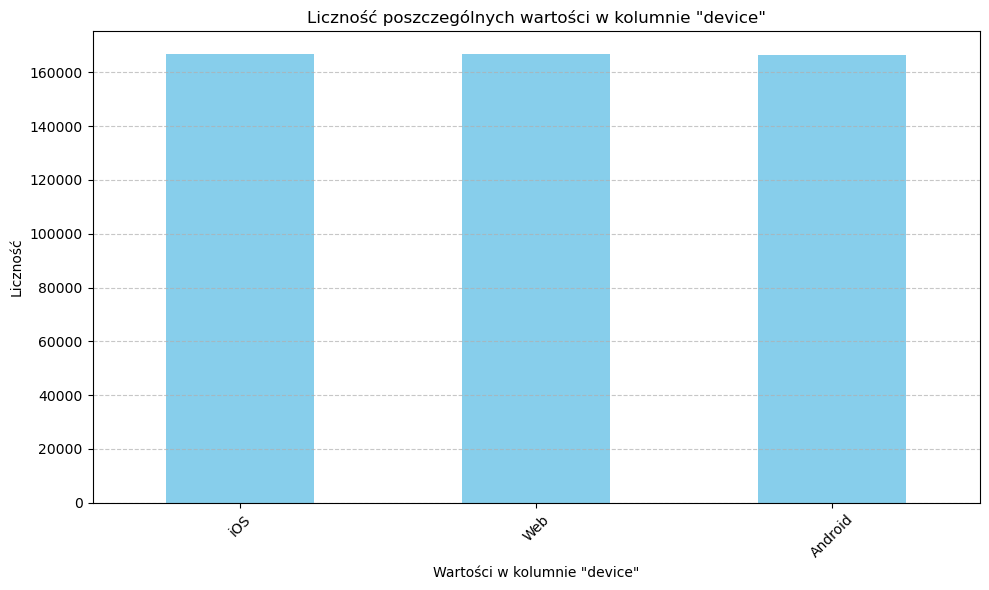

In [4]:
import matplotlib.pyplot as plt
device_counts = df['device'].value_counts()
plt.figure(figsize=(10, 6))  
device_counts.plot(kind='bar', color='skyblue') 
plt.title('Liczność poszczególnych wartości w kolumnie "device"')  
plt.xlabel('Wartości w kolumnie "device"')  
plt.ylabel('Liczność')  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()  